In [4]:
import matplotlib.pyplot as plt
import numpy as np
import scipy

In [68]:
pixels_x = 100
pixels_y = 100

stage_matrix = np.zeros(shape=(pixels_x,pixels_y))

id_x = 50
id_y = 50
radius = 50

for i in range(len(stage_matrix)):
    for j in range(len(stage_matrix[i])):
        if (i - id_x)**2 + (j - id_y)**2 <= radius**2:
            stage_matrix[i,j] = 0
        else:
            stage_matrix[i,j] = 1


Text(0.5, 1.0, 'Stage')

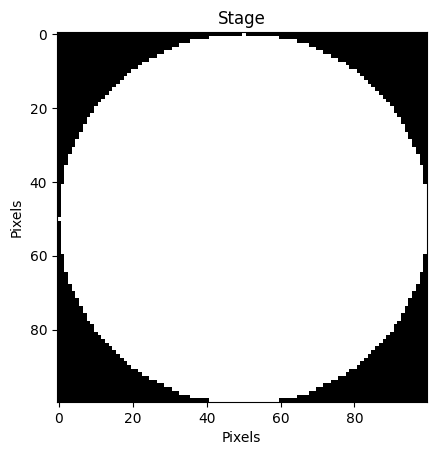

In [69]:
fig, ax = plt.subplots()

ax.imshow(stage_matrix, cmap = "Greys")
ax.set_xlabel("Pixels")
ax.set_ylabel("Pixels")
ax.set_title("Stage")

In [90]:
import numpy as np

def create_trajectory(stage_matrix, pixels_x, pixels_y, initial_id_x=None, initial_id_y=None, speed=1, direction="north", duration=5):
    if initial_id_x is None:
        initial_id_x = pixels_x // 2
    if initial_id_y is None:
        initial_id_y = pixels_y // 2
    
    trajectory_matrix = []
    
    for i in range(duration):
        trajectory_matrix.append(stage_matrix)
    
    trajectory_matrix[0][initial_id_x, initial_id_y] = 1
    
    real_time_id_x = initial_id_x
    real_time_id_y = initial_id_y
    
    for total_elapsed_time in range(1, duration):  
        if direction == "north":
            real_time_id_y += speed 
        elif direction == "south":
            real_time_id_y -= speed
        elif direction == "east":
            real_time_id_x += speed
        elif direction == "west":
            real_time_id_x -= speed
        
        # Check boundaries to avoid index out of range
        real_time_id_x = max(0, min(real_time_id_x, pixels_x - 1))
        real_time_id_y = max(0, min(real_time_id_y, pixels_y - 1))
        
        trajectory_matrix[total_elapsed_time, real_time_id_x, real_time_id_y] = 1
        
    return trajectory_matrix

pixels_x = 100
pixels_y = 100


In [91]:
trajectory_matrix = create_trajectory(stage_matrix, pixels_x = 100, pixels_y = 100, speed = 1, direction = "north", duration = 10)

IndexError: index 50 is out of bounds for axis 0 with size 10

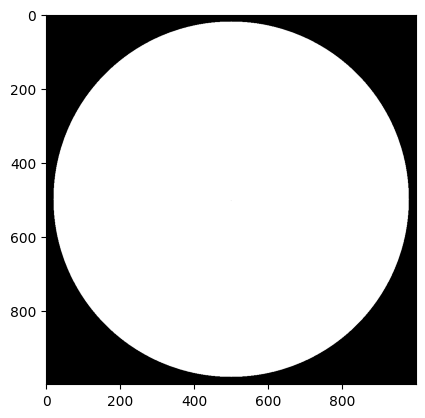

In [84]:
fig, ax = plt.subplots()

ax.imshow(trajectory_matrix[3], cmap = "Greys")